# Корреляция и корреляционный анализ

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams['font.size'] = 14
rcParams['figure.figsize'] = 10, 6

In [4]:
df = pd.read_csv('water.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [6]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


## Задача 1. Исследование связи между смертностью и жесткостью воды
### Точечный график

Text(0, 0.5, 'Смертность')

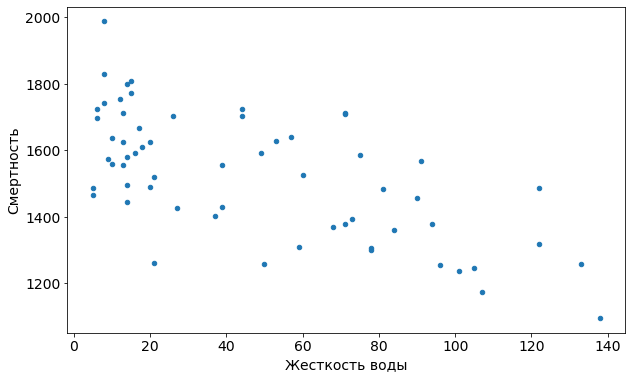

In [7]:
ax = df.plot(kind='scatter', x='hardness', y='mortality')
ax.set_xlabel('Жесткость воды')
ax.set_ylabel('Смертность')

Единственный более-менее конкретный вывод, который можно сделать по графику: между смертностью населения и жесткостью воды существует обратная связь: при увеличении жесткости воды смертность уменьшается.

### Коэффициенты корреляции

In [8]:
# Пирсона
prs_corr = df[['mortality', 'hardness']].corr().iloc[0, 1]
# Спирмена
spr_corr = df[['mortality', 'hardness']].corr(method='spearman').iloc[0, 1]
print(f'Коэффициенты корреляции\nПирсона: {prs_corr}\nСпирмена: {spr_corr}')

Коэффициенты корреляции
Пирсона: -0.6548486232042464
Спирмена: -0.6316646189166502


### Модель линейной регрессии

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df[['hardness']]
y = df['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_

array([-3.31576799])

In [14]:
model.intercept_

1678.9405326885008

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

### Коэффициент детерминации

In [16]:
model.score(X_test, y_test)

0.410213439338294

### График остатков

Text(0, 0.5, 'Остатки')

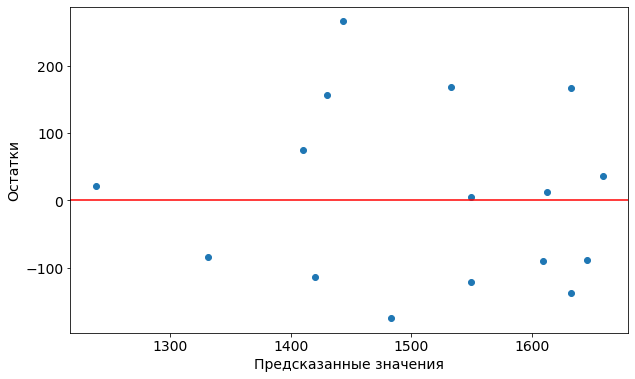

In [50]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)

base_line = [0, 0, max(y_pred)]
plt.axhline(*base_line, color='red')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')

### Выводы
График остатков и низкий коэффициент детерминации свидетельствуют о том, что построенная модель линейной регрессии малоээфективна для данного набора данных.

## Задача 2. Исследование связи между смертностью и жесткостью воды для Северных и Южных городов

In [52]:
# Южные города
south_cities = df[df.location == 'South']
# Северные города
north_cities = df[df.location == 'North']

In [53]:
print(len(south_cities), len(north_cities))

26 35


## Южные города
### Точечный график

Text(0, 0.5, 'Смертность')

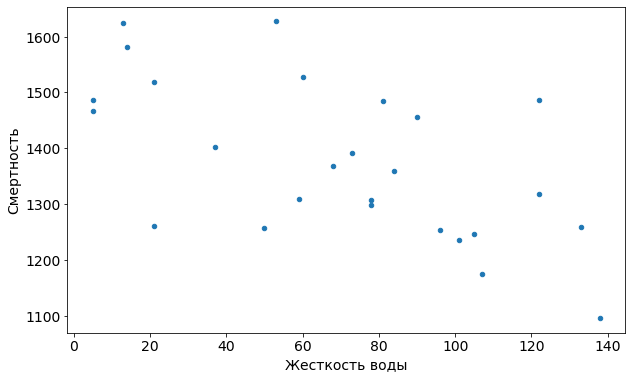

In [54]:
ax = south_cities.plot(kind='scatter', x='hardness', y='mortality')
ax.set_xlabel('Жесткость воды')
ax.set_ylabel('Смертность')

### Коэффициенты корреляции

In [55]:
# Пирсона
prs_corr = south_cities[['mortality', 'hardness']].corr().iloc[0, 1]
# Спирмена
spr_corr = south_cities[['mortality', 'hardness']].corr(method='spearman').iloc[0, 1]
print(f'Коэффициенты корреляции\nПирсона: {prs_corr}\nСпирмена: {spr_corr}')

Коэффициенты корреляции
Пирсона: -0.6021532715484159
Спирмена: -0.5957229185013566


### Модель линейной регрессии

In [56]:
X = south_cities[['hardness']]
y = south_cities['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

model = LinearRegression()
model.fit(X_train, y_train) 

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X_test)
print(y_pred)

[-1.63213686]
1498.8120440606008
[1333.96622159 1281.73784219 1379.66605356 1412.30879068 1327.43767416
 1324.17340045 1342.12690587]


### Коэффициент детерминации

In [57]:
model.score(X_test, y_test)

0.3394549037699447

### График остатков

Text(0, 0.5, 'Остатки')

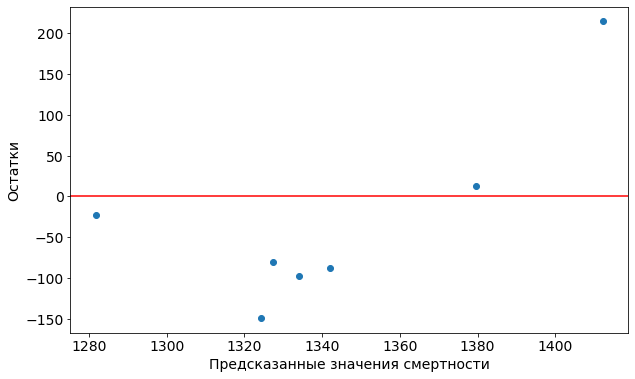

In [58]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)

base_line = [0, 0, max(y_pred)]
plt.axhline(*base_line, color='red')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')

## Северные города
### Точечный график

Text(0, 0.5, 'Смертность')

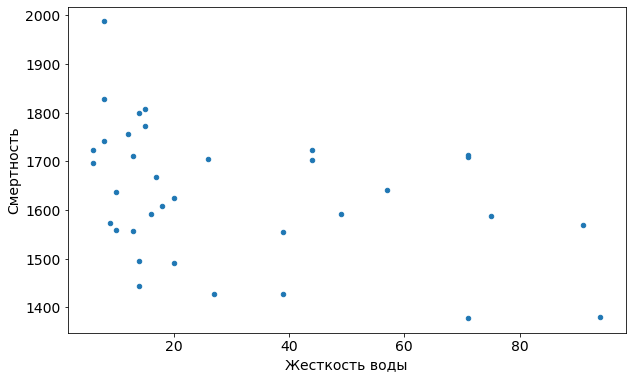

In [59]:
ax = north_cities.plot(kind='scatter', x='hardness', y='mortality')
ax.set_xlabel('Жесткость воды')
ax.set_ylabel('Смертность')

### Коэффициенты корреляции

In [60]:
# Пирсона
prs_corr = north_cities[['mortality', 'hardness']].corr().iloc[0, 1]
# Спирмена
spr_corr = north_cities[['mortality', 'hardness']].corr(method='spearman').iloc[0, 1]
print(f'Коэффициенты корреляции\nПирсона: {prs_corr}\nСпирмена: {spr_corr}')

Коэффициенты корреляции
Пирсона: -0.36859783832887183
Спирмена: -0.4042078956511175


### Модель линейной регрессии

In [61]:
X = north_cities[['hardness']]
y = north_cities['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

model = LinearRegression()
model.fit(X_train, y_train) 

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X_test)
print(y_pred)

[-2.02797546]
1692.9939123265372
[1640.26655027 1662.57428037 1660.54630491 1656.49035398 1674.74213315
 1593.6231146  1603.76299192 1549.0076544  1549.0076544 ]


### Коэффициент детерминации

In [62]:
model.score(X_test, y_test)

0.09281149479048578

### График остатков

Text(0, 0.5, 'Остатки')

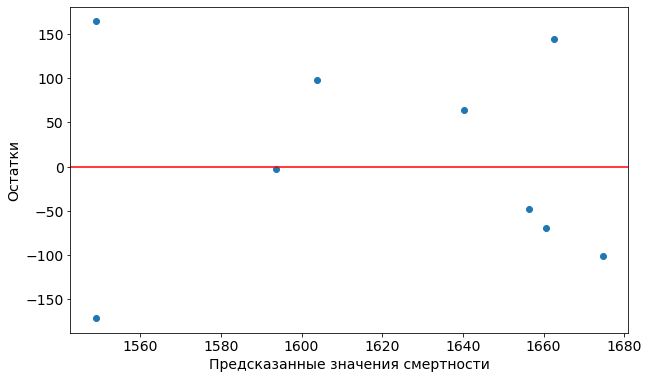

In [63]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)

base_line = [0, 0, max(y_pred)]
plt.axhline(*base_line, color='red')
plt.xlabel('Предсказанные значения смертности')
plt.ylabel('Остатки')

## Выводы
1) Коэффициенты корреляции для Южных городов больше (по модулю), чем для Северных. Возможно, это вызвано тем, что на Севере присутствуют факторы, которые оказывают на смертность влияние более сильное, нежели жесткость воды.
2) По причине небольшого количества данных (26 южных и 35 северных городов) качество обучения модели сильно зависит от разбиения данных на обучающую и тестовую выборки. Это можно проверить, поэскпериментировав с параметром random_state.
3) В целом, регрессионная модель, построенная на основе всех городов, показывает лучшее качество предсказания, нежели модели для южных и северных городов. Это подкрепляется и тем, что коэффициенты корреляции у общей модели больше, чем у южного и северного регионов. Однако у южного региона коэффициенты корреляции тоже достаточно высокие. Более низкий коэффициент детерминации можно объяснить причиной, упомянутой в пункте 2 (выше).